Matplotlib is building the font cache; this may take a moment.


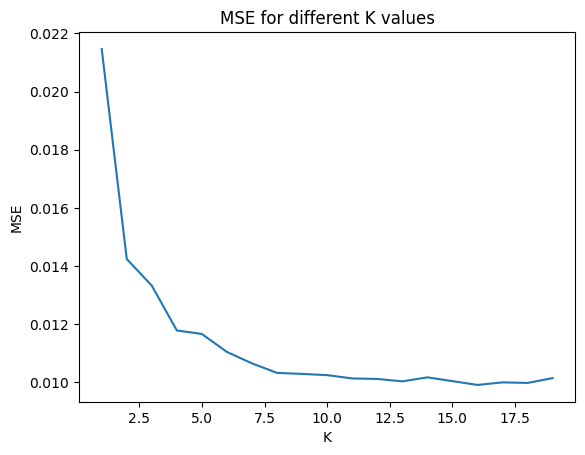

Optimal K: 16


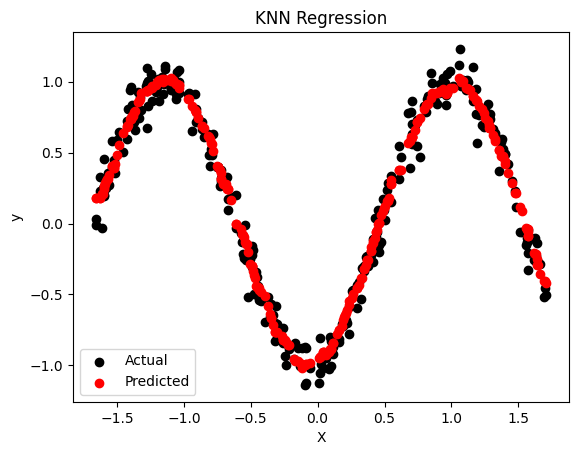

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Генерація випадкових даних
np.random.seed(42)
X = np.random.rand(1000, 1) * 10
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Нормалізація даних
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Розділення на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Підбір оптимального K
k_values = range(1, 20)
mse_values = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse_values.append(mean_squared_error(y_test, y_pred))

# Візуалізація результатів
plt.plot(k_values, mse_values)
plt.xlabel('K')
plt.ylabel('MSE')
plt.title('MSE for different K values')
plt.show()

# Візуалізація регресії для оптимального K
optimal_k = k_values[np.argmin(mse_values)]
print(f"Optimal K: {optimal_k}")

knn = KNeighborsRegressor(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

plt.scatter(X_test, y_test, color='black', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('KNN Regression')
plt.legend()
plt.show()